# Sentiment analysis

In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import csv
import datetime as dt
import matplotlib.dates as mdates
import numpy as np
import math

### Importing the file and assigning polarity and subjectivity

In [2]:
github_url = 'https://raw.githubusercontent.com/ignacyklimont/MDA-Project-Obama-Speeches/main/speeches_clean.csv'
df_speeches = pd.read_csv(github_url)
df_speeches.columns = ['Title', 'Date', 'Text']

In [3]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df_speeches['Polarity'] = df_speeches['Text'].apply(pol) # Applying polarity analysis
df_speeches['Subjectivity'] = df_speeches['Text'].apply(sub) # Applying subjectivity analysis

### Overview of sentiment of speeches by Barack Obama from 2008 to 2017

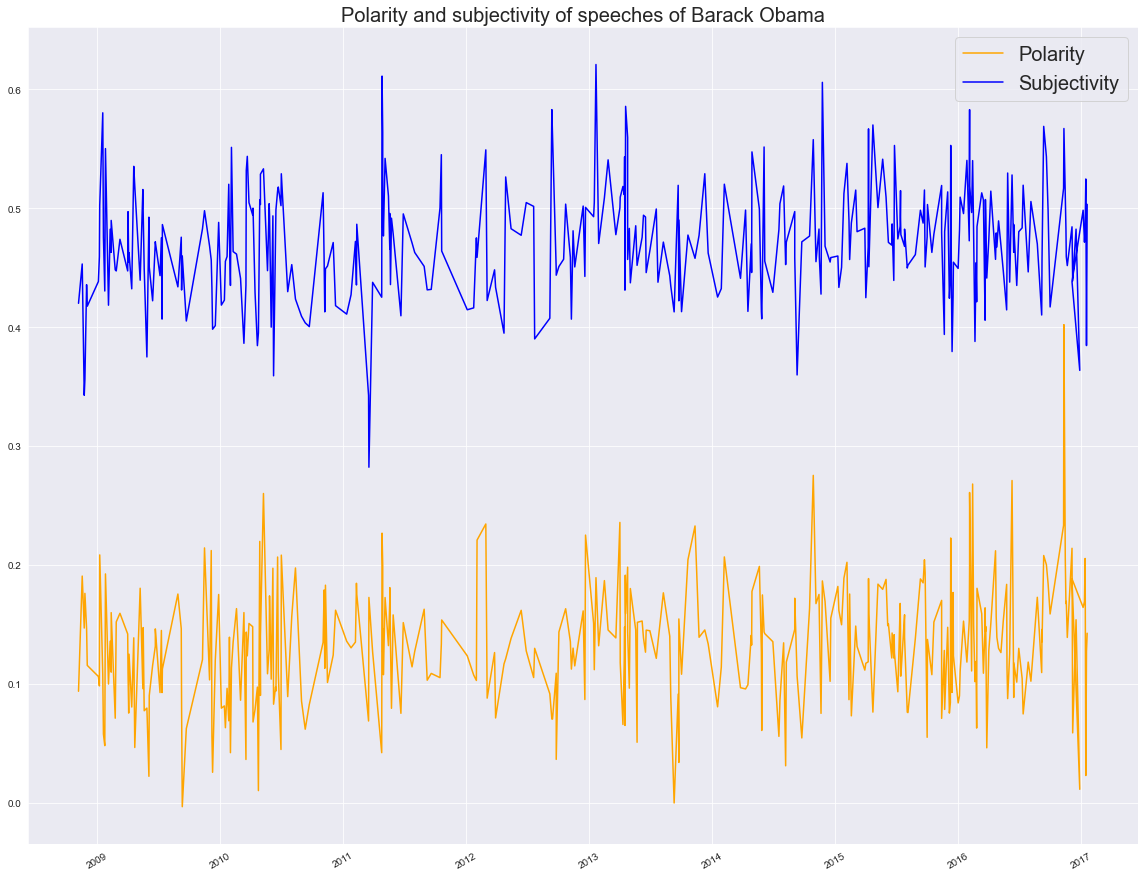

In [18]:
plt.plot(df_speeches['Date'], df_speeches['Polarity'], 'orange', label = 'Polarity')
plt.plot(df_speeches['Date'], df_speeches['Subjectivity'], 'blue', label = 'Subjectivity')
plt.xticks(rotation=30)
plt.tight_layout()
plt.title('Polarity and subjectivity of speeches of Barack Obama', fontsize=20)
plt.legend(loc='best', fontsize=20)
plt.show()

### TOP 10 most positive speeches

In [5]:
df_speeches.nlargest(n=10, columns=['Polarity']) # TOP 10 most positive speeches

,Title,Date,Text,Polarity,Subjectivity
351,First Meeting with President-Elect Donald Trump,2016-11-10,ort audio element click authenticity certified...,0.402135,0.567049
233,Ebola Response Update Speech,2014-10-28,ticity certified text version directly audio g...,0.275446,0.557706
333,Presidential Endorsement of Hillary Clinton,2016-06-09,io element click authenticity certified text v...,0.271111,0.528000
308,Address on the Passing of USSC Justice Antonin...,2016-02-13,ent click authenticity certified text version ...,0.268157,0.540059
306,Honoring Golden State Warriors 2015 NBA Champs,2016-02-04,lcome white house everybody give champion gold...,0.261031,0.518756
78,Speech Nominating Elena Kagan for USSC Justice,2010-05-10,ort audio element click authenticity certified...,0.260201,0.533155
172,BRAIN Initiative Announcement,2013-04-02,ticity certified text version directly audio f...,0.235881,0.500264
139,Iraq War Veterans and Families Gala Toast,2012-02-29,outstanding extraordinary leadership helping g...,0.234564,0.549103
350,Remarks on the U.S. Presidential Election Outcome,2016-11-09,noon everybody yesterday shot video may seen s...,0.233449,0.516810
203,Veterans Day Address,2013-11-11,irectly audio thank secretary lifetime service...,0.232903,0.457915


### TOP 10 most subjective speeches

In [7]:
df_speeches.nlargest(n=10, columns=['Subjectivity']) # TOP 10 most subjective speeches

,Title,Date,Text,Polarity,Subjectivity
167,Inaugural Luncheon Toast,2013-01-21,extraordinary partner extraordinary friend wi...,0.189441,0.620859
113,Speech on Release of Official Certification of...,2011-04-27,irst fact get break back listening chuck sayin...,0.226865,0.611127
238,On Ferguson Grand Jury Decision,2014-11-24,ect intense disagreement across want say sugge...,0.186704,0.605863
179,Third Statement on Boston Marathon Bombings,2013-04-19,dy tonight nation debt people boston people vi...,0.159290,0.585675
151,Rose Garden Address on Benghazi Attacks,2012-09-12,ning every day across world work tirelessly ad...,0.070621,0.582945
305,Speech at the 64th National Prayer Breakfast,2016-02-04,g giving praise honor god us together morning ...,0.198899,0.582895
9,Lincoln Memorial Pre-Inauguration Speech,2009-01-18,ant thank today us song love want thank bravin...,0.108106,0.580250
258,On Hostages Warren Weinstein and Giovanni Lo P...,2015-04-23,ent click authenticity certified text version ...,0.076427,0.570036
346,9/11 Memorial Address,2016-09-11,pture us  let steadfast love faithfulness for...,0.208065,0.568838
351,First Meeting with President-Elect Donald Trump,2016-11-10,ort audio element click authenticity certified...,0.402135,0.567049


### Splitting seven chosen texts into parts to evaluate sentiment distribution across each part of the speech

In [19]:
 # The function takes in a string of text and splits into n (n = 10) equal parts
 def split_text(text, n=10):
    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [20]:
speech_split = []
for i in [0, 52, 69, 118, 135, 159, 163]:
    speech_split.append(split_text(df_speeches.iloc[i, 2])) # 0: First Victory Speech, 52: Nobel Prize,
                # 69: Health Care Law, 118: Death of Bin-Laden, 135: End of Iraq War, 159: Second Victory Speech,
                #163: Sandy Hook School Shooting
speech_amount = len(speech_split)

In [21]:
speech_pol = []
for i in range(speech_amount):
    pol = []
    for j in range(10):
        pol.append(TextBlob(speech_split[i][j]).sentiment.polarity)
    speech_pol.append(pol)

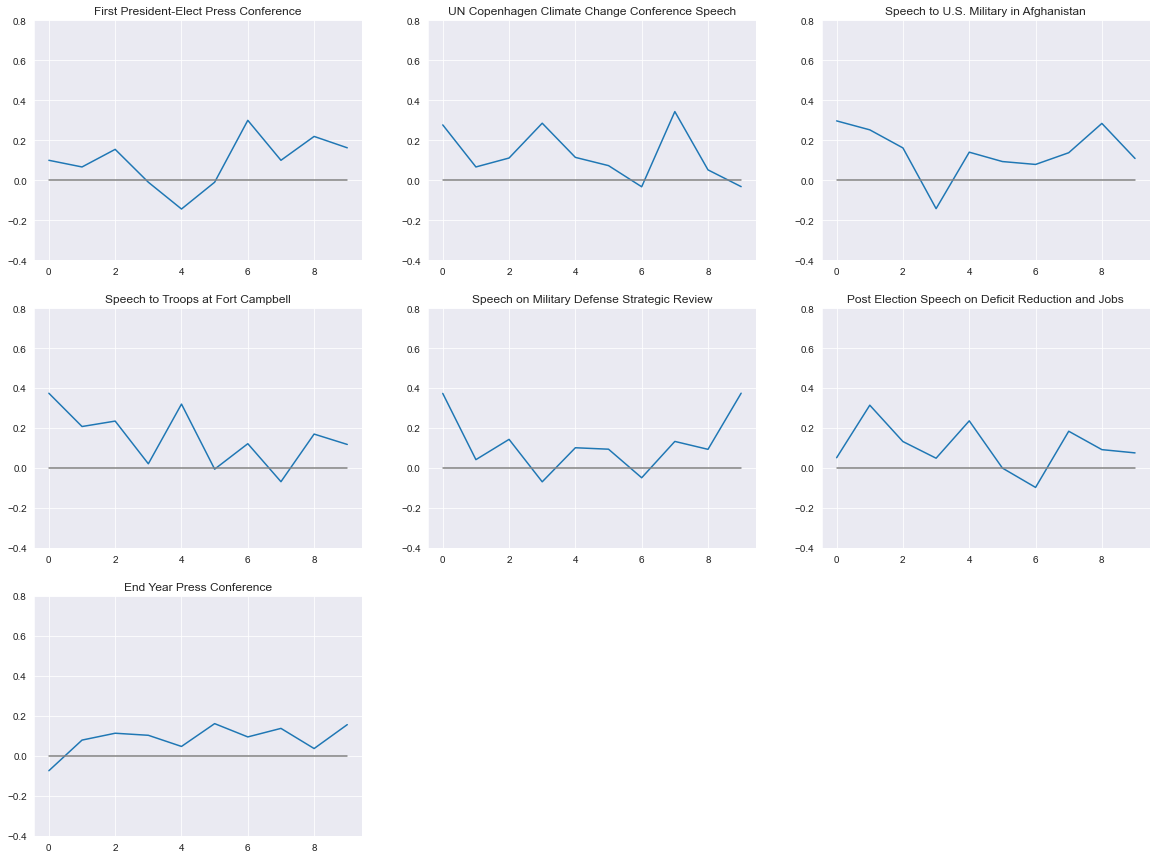

In [23]:
plt.rcParams['figure.figsize'] = [20, 15]
n=0
nw = [0, 52, 69, 118, 135, 159, 163]
for nr in range(0,speech_amount):    
    plt.subplot(math.ceil(speech_amount/3), 3, n+1)
    n+=1
    plt.plot(speech_pol[nr])
    plt.plot(np.arange(0,10), np.zeros(10),color='grey')
    plt.title(df_speeches.iloc[nw[n-1],0])
    plt.ylim(ymin=-.4, ymax=.8)
plt.show()